<a href="https://colab.research.google.com/github/elangbijak4/On_Progress_for_Build_Quantum_Virtual_Machine_Almudaya/blob/main/Quantum_Universal_Turing_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  cirq

In [ ]:
!pip install cirq --upgrade  # Upgrade Cirq to the latest version

In [4]:
import cirq
import matplotlib.pyplot as plt

In [11]:
from cirq.contrib.svg import SVGCircuit  # Import the necessary module for drawing

In [16]:
from IPython.display import SVG, display  # Import display from IPython

In [47]:
import numpy as np

Demonstrasi QUTM (Quantum Universal Turing Machine) Kandidat Mesin Virtual Kuantum atau Simulator Sirkuit.

In [126]:
# Function to simulate and plot a multi-qubit state
def simulate_and_plot_multi(circuit, qubits, title):
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)
    state_vector = result.final_state_vector
    probabilities = np.abs(state_vector)**2

    # Generate labels for the state vectors based on the qubits involved in the circuit
    num_qubits = len(circuit.all_qubits()) # Determine the number of qubits from the circuit
    labels = ['|' + ''.join(str(i) for i in format(x, f'0{num_qubits}b')) + '⟩' for x in range(2**num_qubits)]

    plt.bar(labels, probabilities, color=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow'])
    plt.title(title)
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.xticks(rotation=90) # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

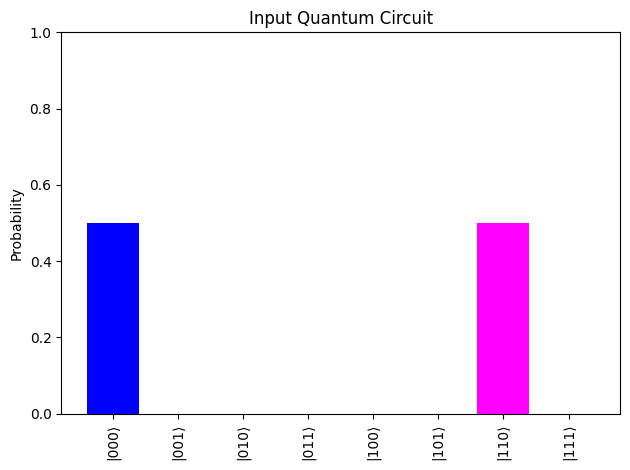

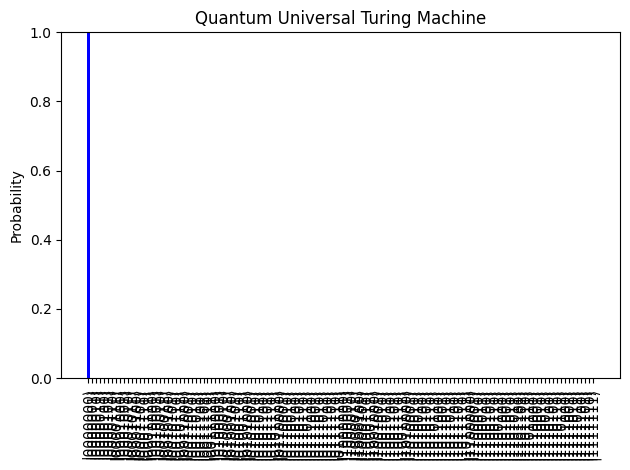

Quantum Universal Turing Machine Circuit:
(0, 0): ───H───@───M───────────────
               │
(0, 1): ───────X───X───@───M───────
                   │   │
(0, 2): ───T───────┼───@───×───M───
                   │   │   │
(0, 3): ───────────┼───┼───×───M───
                   │   │   │
(0, 4): ───M───────┼───┼───┼───────
                   │   │   │
(1, 0): ───M───────┼───┼───┼───────
                   │   │   │
(2, 0): ───────────@───X───@───M───


In [127]:
# Define QUTM components
num_tape_cells = 5
tape = [cirq.GridQubit(0, i) for i in range(num_tape_cells)]
head = cirq.GridQubit(1, 0)
control_state = cirq.GridQubit(2, 0)

# Define the QUTM Circuit
circuit_qutm = cirq.Circuit()

# Example of an input circuit to be executed by QUTM
input_circuit = cirq.Circuit(
    cirq.H(tape[0]),
    cirq.CNOT(tape[0], tape[1]),
    cirq.T(tape[2])
)

# Simulating the input circuit
simulate_and_plot_multi(input_circuit, tape, 'Input Quantum Circuit')

# Simulate QUTM executing the input circuit
# Initialize the QUTM with the input circuit
circuit_qutm.append(input_circuit)

# Example transition within QUTM
circuit_qutm.append(cirq.CNOT(control_state, tape[1]))  # Example transition

# Example of using Toffoli to control state transitions
circuit_qutm.append(cirq.TOFFOLI(tape[1], tape[2], control_state))

# Example of using Fredkin gate
circuit_qutm.append(cirq.FREDKIN(control_state, tape[2], tape[3]))

# Measure the final states
circuit_qutm.append([cirq.measure(q) for q in tape])
circuit_qutm.append(cirq.measure(head))
circuit_qutm.append(cirq.measure(control_state))

# Simulate and plot the QUTM circuit
simulate_and_plot_multi(circuit_qutm, tape + [head, control_state], 'Quantum Universal Turing Machine')

# Print the circuit
print("Quantum Universal Turing Machine Circuit:")
print(circuit_qutm)

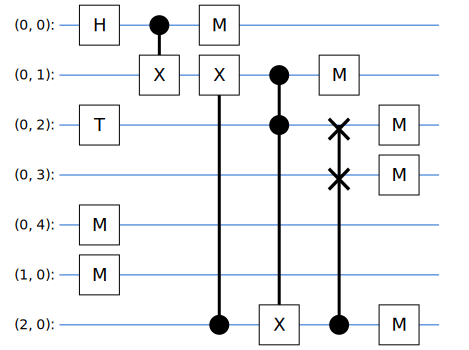

In [128]:
# Use SVGCircuit to draw the circuit
svg_circuit = cirq.contrib.svg.SVGCircuit(circuit_qutm)
svg_string = svg_circuit._repr_svg_()
display(SVG(svg_string))